In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [26]:
df = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c3/2/liver_disease_.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [27]:
# finding row with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# The missing values are MCAR category

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio Dataset  
209      3.9                         NaN     Yes  
241      3.1                         NaN     Yes  
253      2.7                         NaN      No  
312      4.8            

In [28]:
# replacing missing values with mean, since there are no evident outliers that could bias the model
agr_mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(agr_mean, inplace=True)

# It turns out that content in 'Gender' column has trailing/leading space
# that caused Failure in replace function. 
# So strip the space.
df['Gender'] = df['Gender'].str.strip()
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Gender'] = df['Gender'].replace({"Male":1})
df['Gender'] = df['Gender'].replace({"Female":0})

# Chnage target variable
df['Dataset'] = df['Dataset'].str.strip()
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Dataset'] = df['Dataset'].replace({"Yes":1})
df['Dataset'] = df['Dataset'].replace({"No":0})

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [29]:
# Separate the data into variables and result
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values

numf = X.size/y.size
print("Num Features :", numf)

Num Features : 10.0


In [30]:
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1,0.0565603,0.0117627,0.00752914,0.0804246,-0.0868828,-0.0199099,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.0565603,1,0.0892908,0.100436,-0.0274962,0.0823322,0.0803362,-0.089121,-0.0937993,-0.00340381,0.0824159
Total_Bilirubin,0.0117627,0.0892908,1,0.874618,0.206669,0.214065,0.237831,-0.00809934,-0.22225,-0.206159,0.220208
Direct_Bilirubin,0.00752914,0.100436,0.874618,1,0.234939,0.233894,0.257544,-0.000138741,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.0804246,-0.0274962,0.206669,0.234939,1,0.12568,0.167196,-0.0285144,-0.165453,-0.23396,0.184866
Alamine_Aminotransferase,-0.0868828,0.0823322,0.214065,0.233894,0.12568,1,0.791966,-0.0425182,-0.0297417,-0.0023741,0.163416
Aspartate_Aminotransferase,-0.0199099,0.0803362,0.237831,0.257544,0.167196,0.791966,1,-0.0256454,-0.0852903,-0.0700238,0.151934
Total_Protiens,-0.187461,-0.089121,-0.00809934,-0.000138741,-0.0285144,-0.0425182,-0.0256454,1,0.784053,0.233904,-0.0350082
Albumin,-0.265924,-0.0937993,-0.22225,-0.228531,-0.165453,-0.0297417,-0.0852903,0.784053,1,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.00340381,-0.206159,-0.200004,-0.23396,-0.0023741,-0.0700238,0.233904,0.686322,1,-0.162319


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

### Aspartate_Aminotransferase x Alamine_Aminotransferase
### Albumin x Total_Protiens
### Total_Bilirubin x Direct_Bilirubin
### Albumin_and_Globulin_Ratio x Albumin

### Features that have strong correlation between them, could cause accruacy low in Naiive Bayes

In [32]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

In [40]:
print("Training Report")
print(metrics.classification_report(y_train, train_pred))
print(model.score(X_train, y_train))

Training Report
              precision    recall  f1-score   support

           0       0.38      0.95      0.54       100
           1       0.95      0.38      0.54       249

   micro avg       0.54      0.54      0.54       349
   macro avg       0.66      0.66      0.54       349
weighted avg       0.79      0.54      0.54       349

0.5415472779369628


In [41]:
print("Test Report")
print(metrics.classification_report(y_test, test_pred))
print(model.score(X_test, y_test))

Test Report
              precision    recall  f1-score   support

           0       0.41      0.97      0.58        67
           1       0.97      0.45      0.61       167

   micro avg       0.60      0.60      0.60       234
   macro avg       0.69      0.71      0.60       234
weighted avg       0.81      0.60      0.60       234

0.5982905982905983


In [42]:
pd.crosstab(test_pred, y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predicted,,,
0,65,92,157
1,2,75,77
All,67,167,234


## ROC Curve

In [43]:
y_test_pred_prob = model.predict_proba(X_test)

In [46]:
from sklearn.metrics import roc_curve

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:,1], pos_label=True)

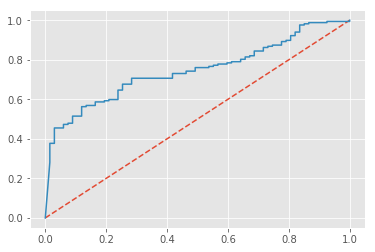

In [49]:
plt.plot([0,1],[0,1],"--")
plt.plot(fpr, tpr)

In [50]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_test_pred_prob[:,1]))

0.7461345964786845
